In [23]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc


In [24]:
# when building deep computer vision ur model expect all data in same size
IMG_SIZE = (80, 80)
channels = 1
char_path = r'C:\Users\momon\Desktop\python learning\opencv\archive\simpsons_dataset'


In [25]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

char_dict = caer.sort_dict(char_dict, descending=True)
#sort in descending order

char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [26]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
# we try to grab the first 10 characters in the list
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [28]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)
# this line grab all the files in each characters folder to make a training set for it

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.03138995170593262s
[INFO] At 1000 files
[INFO] 1454 files found in 0.005446672439575195s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0070536136627197266s
[INFO] At 1000 files
[INFO] 1354 files found in 0.0070476531982421875s
[INFO] At 1000 files
[INFO] 1342 files found in 0.015443563461303711s
[INFO] At 1000 files
[INFO] 1291 files found in 0.0074350833892822266s
[INFO] At 1000 files
[INFO] 1206 files found in 0.003999471664428711s
[INFO] At 1000 files
[INFO] 1194 files found in 0.008198261260986328s
[INFO] At 1000 files
[INFO] 1193 files found in 0.003998279571533203s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003000497817993164s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 42s


In [29]:
len(train)

13811

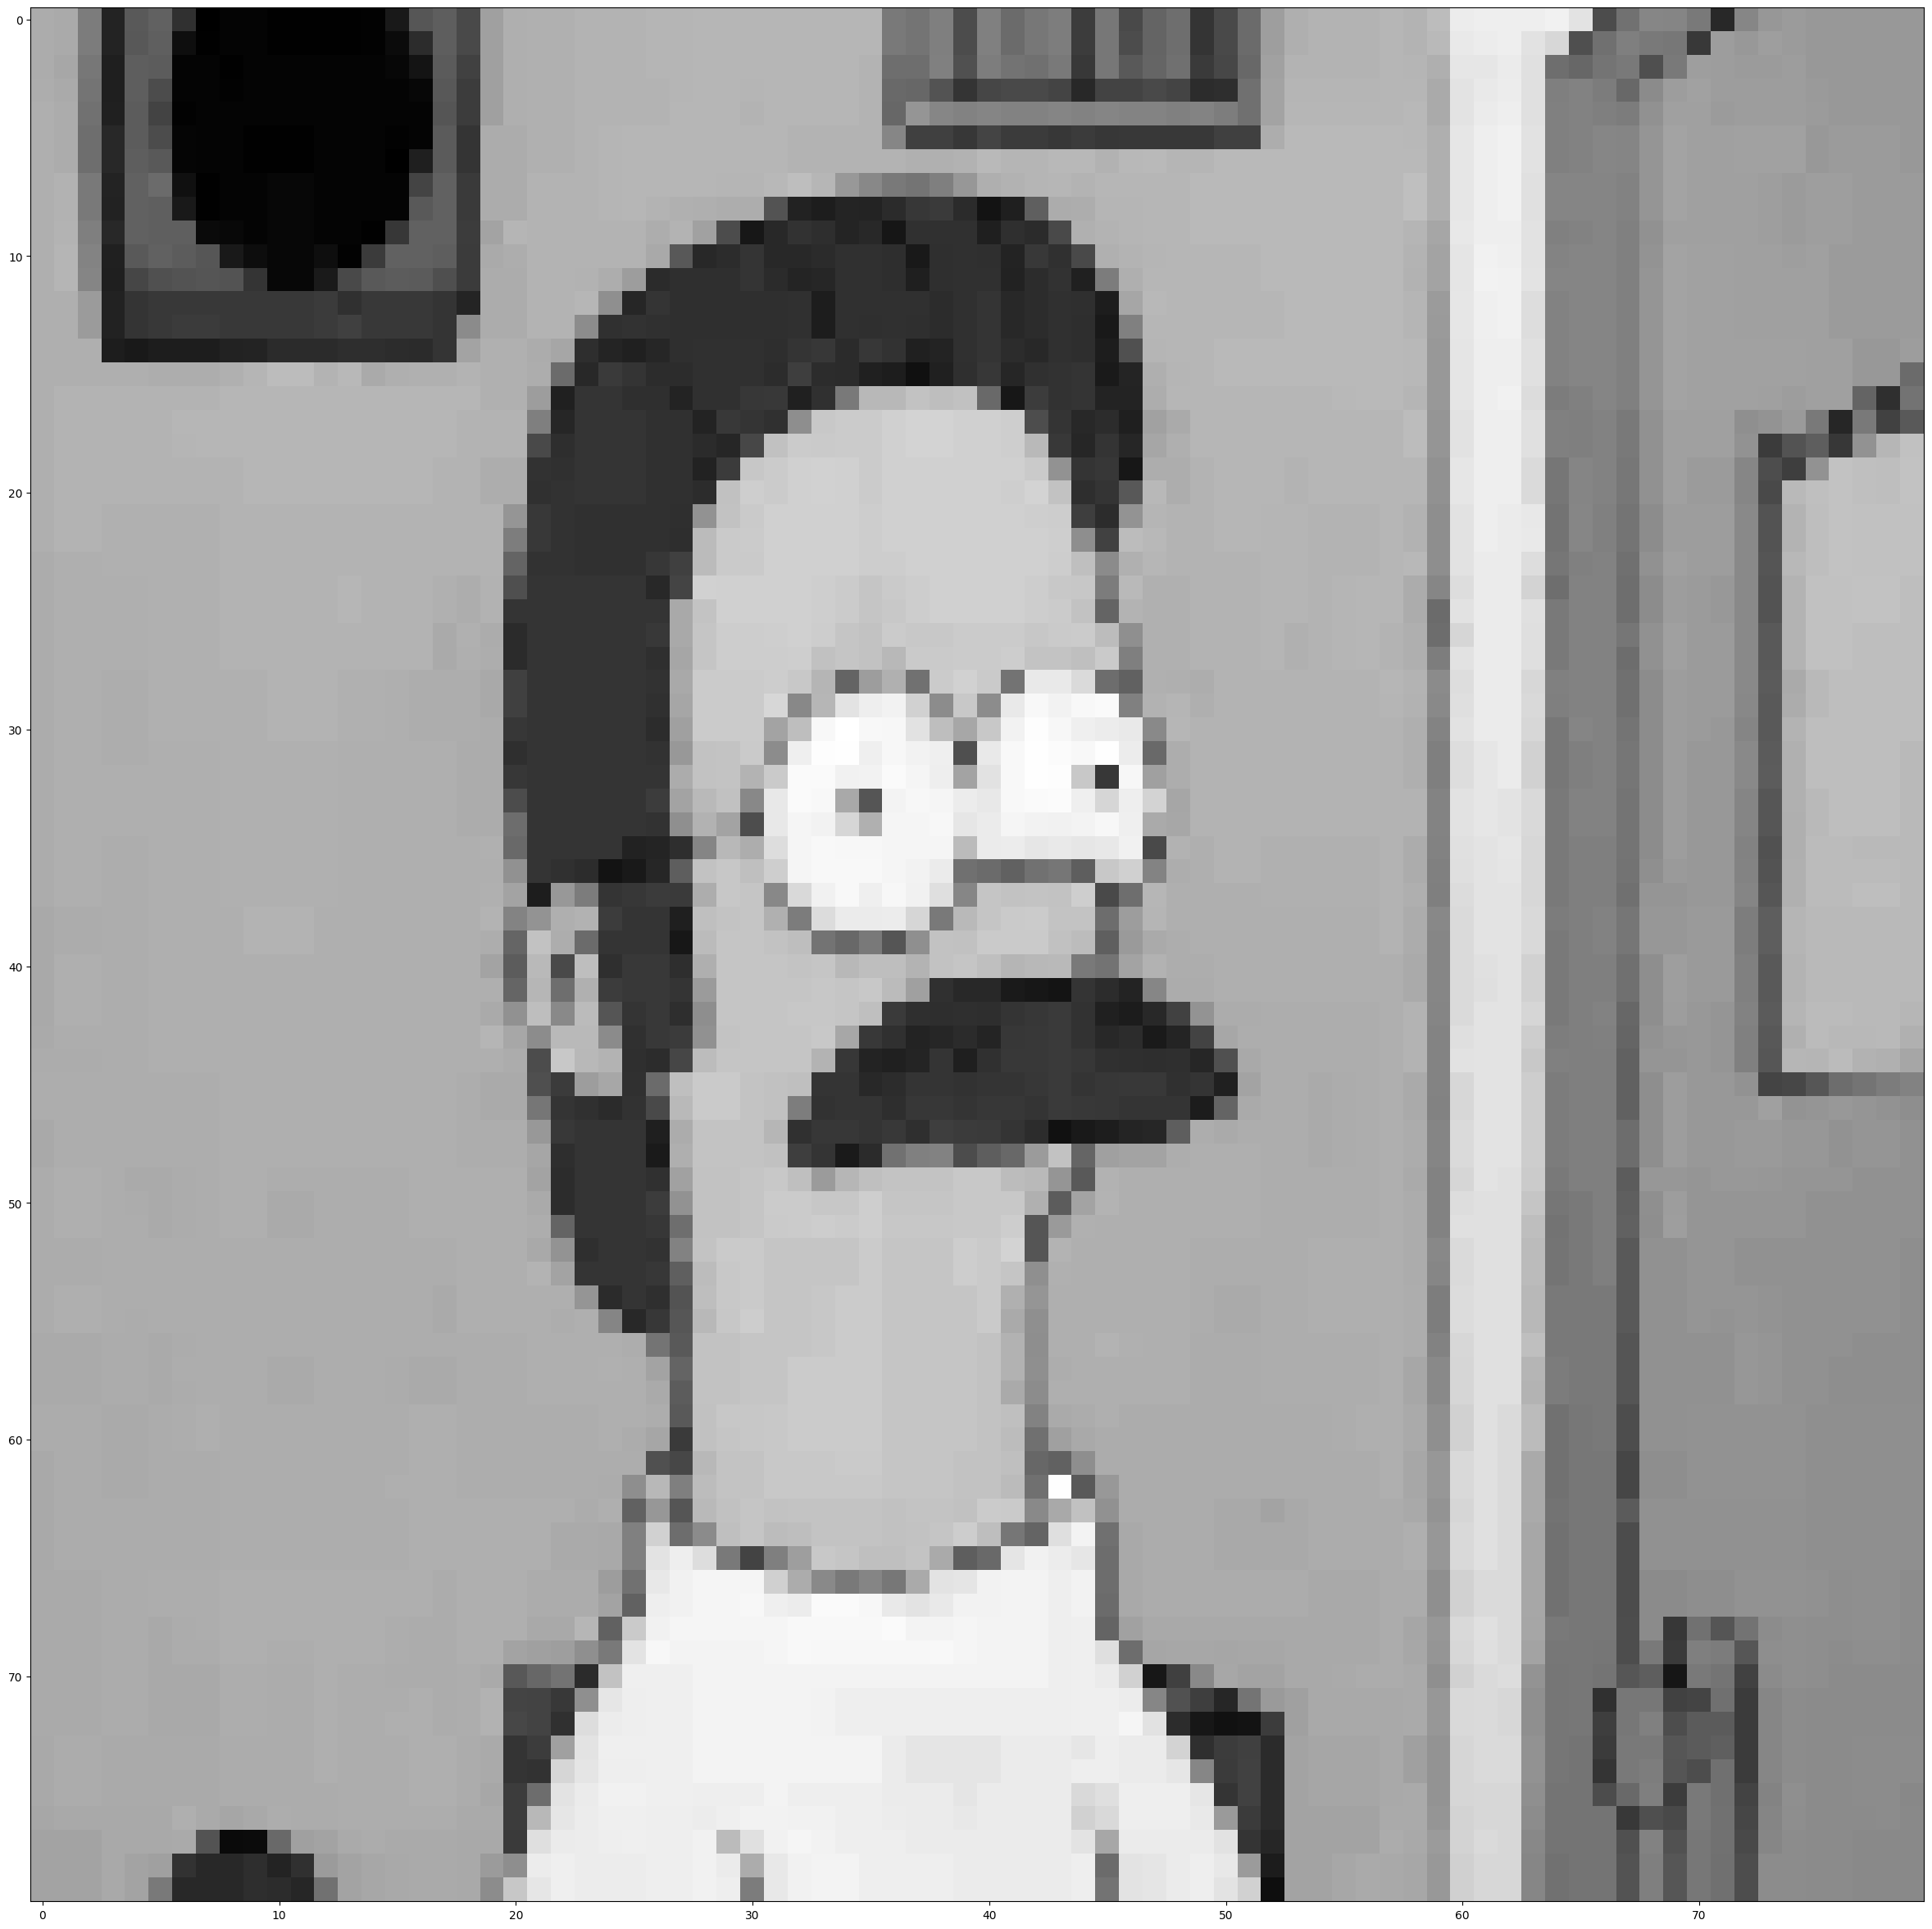

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()
# doesnt use opencv caz opencv doesnt display good img in jupyter notebook

In [31]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [32]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet --> (0,1)
# it will make process run faster
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [33]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [34]:
del train
del featureSet
del labels
gc.collect()

0

In [35]:
BATCH_SIZE = 32
EPOCHS = 10

In [36]:
# image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [50]:
# Create our model (returns a compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

C:\Users\momon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument(s) not recognized: {'lr': 0.001}

: 

In [45]:
model.summary()

NameError: name 'model' is not defined